# 01 - Problem (case study)

In [1]:
#the data i'm about to analyse is a huge Dataframe of numerical and categorical columns
#about the features of clients from a car selling bussiness from EEUU.

In [2]:
#My Goal is read those dates, organise them, manipule them until I can create a 
#good model of prediction of the value 'Total Claim Amount'

# 02 - Getting Data

In [3]:
import pandas as pd
import math
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [4]:
#Import the dataset

os.chdir(r'C:\Users\alber\OneDrive\Desktop\IronHAck\LABS\LABS-unit-1\lab-customer-analysis-final-round\files_for_lab\csv_files')
data = pd.read_csv('marketing_customer_analysis.csv')
display(data.head())

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 03 - Cleaning/Wrangling/EDA

In [5]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Change headers names 

In [6]:
#data.columns = data.columns.str.lower()   #transform all column to lower case
#data.columns = data.columns.str.replace(' ', '_')  #replace spaces for '_'

### Deal with NaN values

In [7]:
#data.isna().any()
data.isna().sum()    #There isn't any NAN value

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [8]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [9]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

### Categorical Features

In [10]:
categorical = data.select_dtypes(include = object)
categorical.columns.to_list()

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size']

### Numerical Features

In [11]:
numerical = data.select_dtypes(exclude = object) 

numerical.columns.to_list()

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

### Exploration

In [12]:
data.shape

(9134, 24)

In [13]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [14]:
data.describe(include = object)

#IMportant for later

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
count,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134,9134
unique,9134,5,2,3,5,59,5,2,3,3,3,9,4,4,6,3
top,PU71194,California,No,Basic,Bachelor,1/10/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Four-Door Car,Medsize
freq,1,3150,7826,5568,2748,195,5698,4658,5779,5298,6788,3426,3752,3477,4621,6424


In [15]:
correlation = data.corr()
display(correlation)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [16]:
data.describe (include = 'all')

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
count,9134,9134,9134.000000,9134,9134,9134,9134,9134,9134,9134.000000,...,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134
unique,9134,5,NaN,2,3,5,59,5,2,NaN,...,NaN,NaN,NaN,3,9,4,4,NaN,6,3
top,PU71194,California,NaN,No,Basic,Bachelor,1/10/11,Employed,F,NaN,...,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize
freq,1,3150,NaN,7826,5568,2748,195,5698,4658,NaN,...,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424
mean,NaN,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,NaN,37657.380009,...,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN
std,NaN,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,NaN,30379.904734,...,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN
min,NaN,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN
25%,NaN,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN
50%,NaN,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,NaN,33889.500000,...,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN
75%,NaN,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,NaN,62320.000000,...,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN


In [17]:
data.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


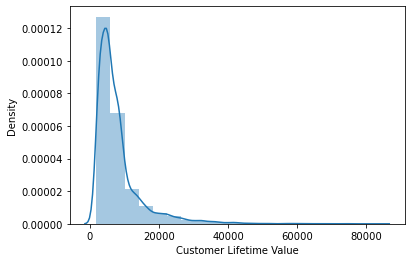

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


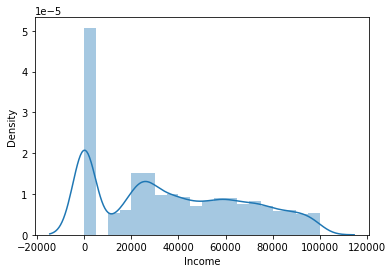

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


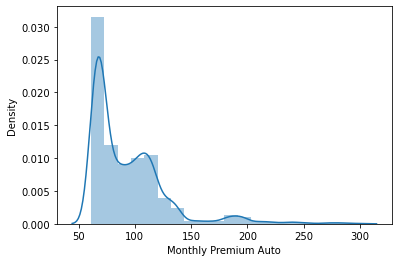

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


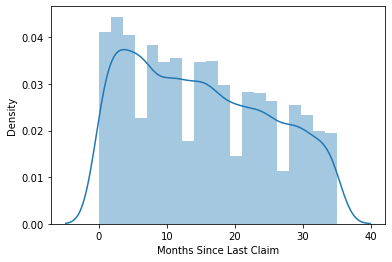

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


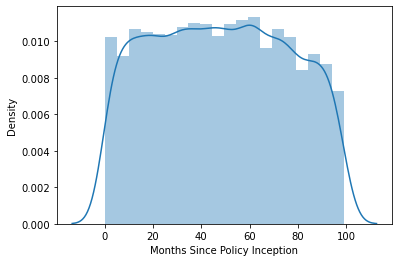

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


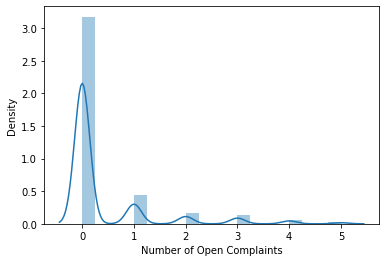

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


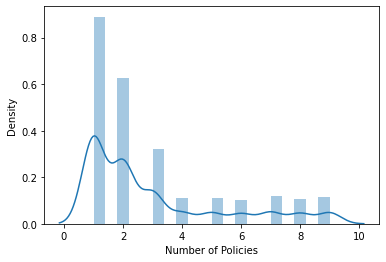

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


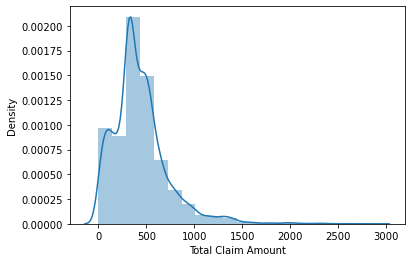

In [18]:
for column in numerical:
    sns.distplot(data[column], bins=20)
    plt.show()

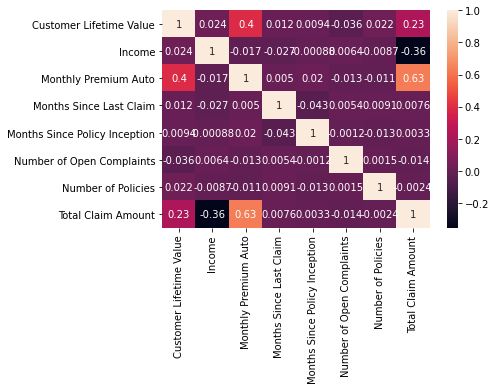

In [19]:
heat_map = sns.heatmap(correlation, annot = True)
figure = heat_map.get_figure()
figure.savefig('heatmap_corr.png', dpi = 400)
plt.show()

# 03 - Processing Data

### Dealing with outliers

In [20]:
numerical.columns.values

array(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'], dtype=object)

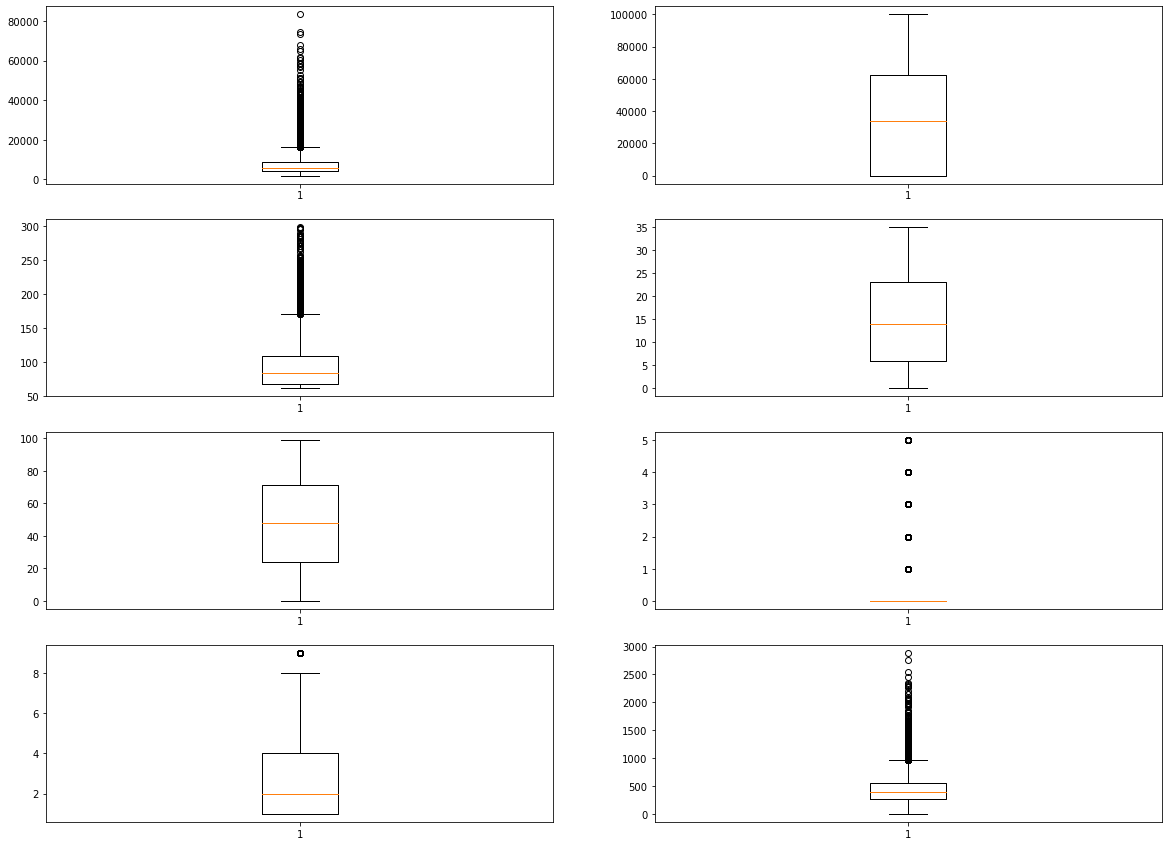

In [21]:
fig, axs = plt.subplots(4, 2, figsize=(20,15))

axs[0, 0].boxplot(data['Customer Lifetime Value'])
axs[0, 1].boxplot(data['Income'])
axs[1, 0].boxplot(data['Monthly Premium Auto'])
axs[1, 1].boxplot(data['Months Since Last Claim'])
axs[2, 0].boxplot(data['Months Since Policy Inception'])
axs[2, 1].boxplot(data['Number of Open Complaints'])
axs[3, 0].boxplot(data['Number of Policies'])
axs[3, 1].boxplot(data['Total Claim Amount'])

plt.show()



#BETTER WAY

#for item in numerical.columns:
    #print(item)
    #sns.boxplot(x = numerical[item])
    #plot.show()

There are a lot fo outliers dor some features, removing the would reduce our data a lot

I will only remove the outliers for 'Number of Policies'

(9134, 24)
(8718, 24)


C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


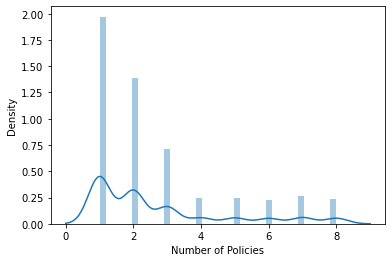

In [22]:
cols = ['Number of Policies'] #column with the outlier

for drop in cols:
    print(data.shape) # To know data's shape before drops

Q1 = data[cols].quantile(0.25)  #first quantile
Q3 = data[cols].quantile(0.75)  #second quantile
IQR = Q3 - Q1           #inter quantiler range

data = data[~(  #Negation so we get the datapoints inside of the range
    (data[cols] < (Q1 - 1.5 * IQR))
    | (data[cols] > (Q3 + 1.5 * IQR)
      )).any(axis=1)]


#Checking of look the boxplots after removing the outliers
print(data.shape)
sns.distplot(data[drop])
plt.show()

In [23]:
#Changing now the names of the columns

In [24]:
data.columns = data.columns.str.lower()   #transform all column to lower case
data.columns = data.columns.str.replace(' ', '_')  #replace spaces for '_'

In [25]:
#Drop columns of less relevance 

In [26]:
drop_columns = ['sales_channel', 'state', 'education', 'number_of_open_complaints',
               'months_since_policy_inception', 'vehicle_class', 'policy',
                'months_since_last_claim']
data = data.drop(columns = drop_columns)

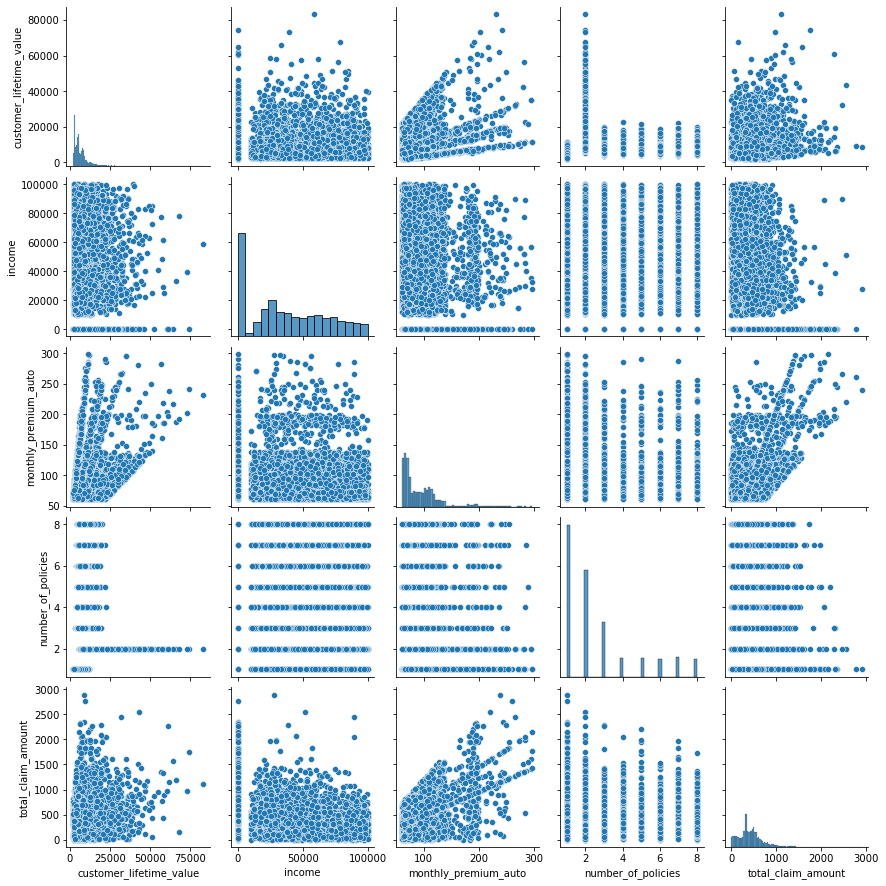

In [27]:
sns.pairplot(data)

#### Doing the split X/y now

In [28]:
target_feat = 'total_claim_amount'
X = data[data.columns.drop(target_feat)]
y = data[target_feat]

### Encoding Categorical Data

In [29]:
#There are two categorical columns in 'X' too big to encode
X = X.drop('customer', axis = 1)
X = X.drop('effective_to_date', axis = 1)

In [30]:
X = pd.get_dummies (X, drop_first = True) #Dummification

    #another way to encode X
#label_enc = preprocessing.LabelEncoder()
#new_data = X.apply(label_enc.fit_transform)


X_feat = X.columns.to_list() #safe feature list for later

### Splitting into train/test sets

In [31]:
X_train,X_test,y_train,y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 25)

In [32]:
print("no of rows X_train = {}".format(len(X_train)))
print("no of rows X_test = {}".format(len(X_test)))
print("no of rows y_train = {}".format(len(y_train)))
print("no of rows y_test = {}".format(len(y_test)))

no of rows X_train = 6974
no of rows X_test = 1744
no of rows y_train = 6974
no of rows y_test = 1744


### Normalization

In [33]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
numerical_transformer = StandardScaler() #initialization of the method
poly = PolynomialFeatures() #initialization of the method
use_poly = False

In [35]:
if use_poly:
    X_train = poly.fit_transform(X_train) #fit and tranform X_train/test with PolynomialFeatures
    X_test = poly.fit_transform(X_test)
else:
    X_train = numerical_transformer.fit_transform(X_train) 
    X_test = numerical_transformer.fit_transform(X_test)  #fit ans transforms X_train/test

In [36]:
        #Another way to normalize
#scaler = MinMaxScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

In [37]:
X_train

array([[-0.79018698,  1.13106562, -0.90647787, ..., -0.35843962,
         0.65058843, -0.48904124],
       [-0.7734555 ,  1.14028438, -0.79123317, ..., -0.35843962,
         0.65058843, -0.48904124],
       [ 8.08220357, -1.23172599,  3.55925413, ..., -0.35843962,
        -1.53707006,  2.04481732],
       ...,
       [-0.34397127, -0.19817485, -0.6471773 , ...,  2.78987013,
        -1.53707006,  2.04481732],
       [-0.53138972, -1.23172599, -0.762422  , ..., -0.35843962,
         0.65058843, -0.48904124],
       [-0.37883971, -0.42132793, -0.73361082, ..., -0.35843962,
        -1.53707006, -0.48904124]])

# 05 - Modeling

### Apply model

In [38]:
#Fit the model to train data 

regressor = LinearRegression() #initialization of the method

        #Other way of modeling
#from sklearn.ensemble import GrandientBoostRegressor
#regressor = GrandientBoostRegressor()



regressor.fit(X_train,y_train) #train on the train data

LinearRegression()

# 6. Evaluate the model

In [39]:
predictions_train = regressor.predict(X_train) #create predictions for our train data
predictions_test = regressor.predict(X_test) #create predictions for our test data

#### R2

In [40]:
from sklearn.metrics import r2_score
r2_train = r2_score(y_train, predictions_train)
r2_test = r2_score(y_test, predictions_test)

print('R2_score on train: ', round(regressor.score(X_train, y_train), 2))
print('R2_score on test: ', round(regressor.score(X_test, y_test), 2))


R2_score on train:  0.77
R2_score on test:  0.78


#### MSE & RMSE

In [41]:
import math
from sklearn.metrics import mean_squared_error

In [42]:
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = mean_squared_error (y_train, predictions_train, squared = False)
print ('MSE score on train: ', round(mse_train, 3))
print ('RMSE score on train: ', round(rmse_train, 3))

print(' ')

mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = mean_squared_error (y_test, predictions_test, squared = False)
print ('MSE score on test: ', round(mse_test, 3))
print ('RMSE score on test: ', round(rmse_test, 3))  

MSE score on train:  20078.087
RMSE score on train:  141.697
 
MSE score on test:  17575.081
RMSE score on test:  132.571


#### MAE

In [43]:
from sklearn.metrics import mean_absolute_error

mae_train = mean_absolute_error (y_train, predictions_train)
print ('MAE score on train: ', round(mae_train, 3))

print(' ')

mae_test = mean_absolute_error (y_test, predictions_test)
print ('MAE score on test: ', round(mae_test, 3))

MAE score on train:  96.71
 
MAE score on test:  95.156


# Reporting

### Present results

C:\Users\alber\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_claim_amount', ylabel='Density'>

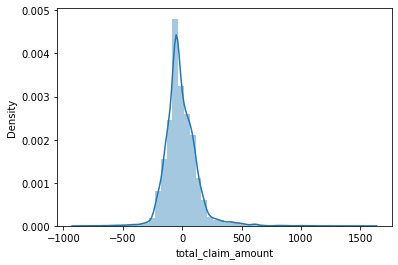

In [44]:
predictions = regressor.predict(numerical_transformer.transform(X)) #create predictions for the full dataset
residuals = y - predictions #Check how far away predictions are from real values
sns.distplot(residuals)

In [45]:
predictions_test = regressor.predict(X_test) #Create predictions for our test data
x = predictions_test [0 : 20] #First 20 for visibility
y = y_test [0 : 20]
t = np.arange(0, x.size) #x-axis

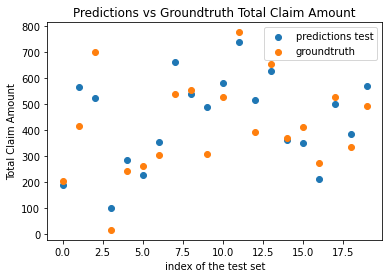

In [46]:
import matplotlib.pyplot as plt 

# Create the figure and axes object
fig, ax = plt.subplots()

plt.scatter(t,x) 
plt.scatter(t,y)

# Add Title
plt.title("Predictions vs Groundtruth Total Claim Amount") 

# Add Axes Labels
plt.xlabel("index of the test set") 
plt.ylabel("Total Claim Amount") 


# Function add a legend  
plt.legend(["predictions test", "groundtruth"], loc ="upper right")

# Display
plt.show()

# Features importance

In [47]:
feature_impor = pd.DataFrame({
    'feature_names' : X_feat,
    'coefficients' : abs(regressor.coef_)
})

feature_impor.sort_values(['coefficients'], ascending = False) #Ranking the features

,feature_names,coefficients
12,location_code_Suburban,183.867230
2,monthly_premium_auto,178.323246
13,location_code_Urban,83.948421
15,marital_status_Single,28.981931
10,employmentstatus_Unemployed,26.244811
18,renew_offer_type_Offer2,10.467839
1,income,9.794409
4,response_Yes,8.548064
11,gender_M,6.124289
19,renew_offer_type_Offer3,5.661841
